In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
sympy_modules = [{'Heaviside': lambda x: np.heaviside(x,0.5)}, 'numpy']

# Traveling Front Derivation
The model in characteristic coordinates is
\begin{align*}
    -c\mu U' &= -U + \int_{\mathbb{R}}w(\xi, y) Q(y) f[U(y)] \ dy \\
    -c \alpha Q' &= 1 - Q - \alpha \beta Q f[U]
\end{align*}
Take $f(\cdot) = H(\cdot - \theta)$ and $w(x,y) = \frac{1}{2}e^{-|x-y|}$.

### params

In [2]:
c, α, β, μ, θ = sym.symbols(r'c \alpha \beta \mu \theta', real=True)
numeric_sub = {
    α: 20,
    β: .2,
    μ: 1,
    θ: .1
}

### Q

In [3]:
ξ, y = sym.symbols(r'\xi y', real=True)

Q = sym.Function('Q')(ξ)
Q_left = sym.dsolve(1 - Q - α*β*Q + c*α*Q.diff(ξ), ics={Q.subs(ξ,0): 1}).args[1].simplify().collect(sym.exp((1+α*β)/(c*α)*ξ))
Q_right = 1
Q_sol = sym.Piecewise((Q_left, ξ<0), (Q_right, True))
display(sym.Eq(Q, Q_sol))

Eq(Q(\xi), Piecewise(((\alpha*\beta*exp(\xi*(\alpha*\beta + 1)/(\alpha*c)) + 1)/(\alpha*\beta + 1), \xi < 0), (1, True)))

### U

In [4]:
U = sym.Function('U')(ξ)

If $\xi > 0$ then
$$
-c \mu U' + U = \frac{1}{2} e^{-\xi} \int_{-\infty}^0 e^y Q(y) \ dy
$$

In [5]:
integral_options = sym.integrate(sym.exp(y) * Q_left.subs(ξ, y), (y, -sym.oo, 0))
# this integral evaluates to different values depending on the parameters
print('Assume')
display(integral_options.args[0].args[1])
integral = integral_options.args[0].args[0]
rhs = sym.Rational(1,2)*sym.exp(-ξ)*integral

Assume


Ne(\alpha, -1/(\beta + c))

In [6]:
sol_right_obj = sym.dsolve(-c*μ*U.diff(ξ) + U - rhs).simplify()
print('Assume')
display(sol_right_obj.args[1].args[0].args[1])
sol_left_not_constrained = sol_right_obj.args[1].args[0].args[0].expand().powsimp()

Assume


Ne(\mu, -1/c)

In [7]:
cond = sol_left_not_constrained.collect(sym.exp(ξ)).coeff(sym.exp(-ξ)).factor()
U_right = cond*sym.exp(-ξ)

If $\xi < 0$ then we will have two terms in the forcing
$$
-c \mu U' + U = \frac{1}{2}e^{-\xi} \int_{-\infty}^\xi e^y Q(y) \ dy + \frac{1}{2}e^\xi \int_{\xi}^0 e^{-y}Q(y) \ dy
$$

In [8]:
integral1_options = sym.integrate(sym.exp(y)*Q_left.subs(ξ, y), (y, -sym.oo, ξ))

In [9]:
print('Assume')
display(integral1_options.args[0].args[1])
integral1 = integral1_options.args[0].args[0].expand().powsimp()
display(integral1)

Assume


Ne(\alpha, -1/(\beta + c))

\alpha**2*\beta*c*exp(\beta*\xi/c + \xi + \xi/(\alpha*c))/(\alpha**2*\beta**2 + \alpha**2*\beta*c + 2*\alpha*\beta + \alpha*c + 1) + \alpha*\beta*exp(\xi)/(\alpha**2*\beta**2 + \alpha**2*\beta*c + 2*\alpha*\beta + \alpha*c + 1) + \alpha*c*exp(\xi)/(\alpha**2*\beta**2 + \alpha**2*\beta*c + 2*\alpha*\beta + \alpha*c + 1) + exp(\xi)/(\alpha**2*\beta**2 + \alpha**2*\beta*c + 2*\alpha*\beta + \alpha*c + 1)

In [10]:
A1, A2 = sym.symbols('A_1 A_2', real=True)
coeffs = [A1, A2]
terms = [sym.exp(ξ), 
         sym.exp((α*β + α*c + 1)/(α*c)*ξ)]
sub_dict = {
    A1: integral1.coeff(sym.exp(ξ)),
    A2: integral1.coeff(sym.exp(β*ξ/c + ξ + ξ/α/c))
}
new_integral1 = sum(c*f for c, f in zip(coeffs, terms))
assert((new_integral1.subs(sub_dict) - integral1).simplify() == 0)

In [11]:
integral2_options = sym.integrate(sym.exp(-y)*Q_left.subs(ξ, y), (y, ξ, 0))

In [12]:
print('Assume')
display(integral2_options.args[0].args[1])
integral2 = integral2_options.args[0].args[0].expand().powsimp()
display(integral2)

Assume


Ne(\alpha, 1/(-\beta + c))

\alpha**2*\beta*c*exp(\beta*\xi/c + \xi/(\alpha*c))/(-\alpha**2*\beta**2*exp(\xi) + \alpha**2*\beta*c*exp(\xi) - 2*\alpha*\beta*exp(\xi) + \alpha*c*exp(\xi) - exp(\xi)) - \alpha**2*\beta*c/(-\alpha**2*\beta**2 + \alpha**2*\beta*c - 2*\alpha*\beta + \alpha*c - 1) - \alpha*\beta/(-\alpha**2*\beta**2*exp(\xi) + \alpha**2*\beta*c*exp(\xi) - 2*\alpha*\beta*exp(\xi) + \alpha*c*exp(\xi) - exp(\xi)) + \alpha*\beta/(-\alpha**2*\beta**2 + \alpha**2*\beta*c - 2*\alpha*\beta + \alpha*c - 1) + \alpha*c/(-\alpha**2*\beta**2*exp(\xi) + \alpha**2*\beta*c*exp(\xi) - 2*\alpha*\beta*exp(\xi) + \alpha*c*exp(\xi) - exp(\xi)) - \alpha*c/(-\alpha**2*\beta**2 + \alpha**2*\beta*c - 2*\alpha*\beta + \alpha*c - 1) - 1/(-\alpha**2*\beta**2*exp(\xi) + \alpha**2*\beta*c*exp(\xi) - 2*\alpha*\beta*exp(\xi) + \alpha*c*exp(\xi) - exp(\xi)) + 1/(-\alpha**2*\beta**2 + \alpha**2*\beta*c - 2*\alpha*\beta + \alpha*c - 1)

In [13]:
B1, B2, B3 = sym.symbols('B_1, B_2, B_3', real=True)
coeffs = [B1, B2, B3]
terms = [1, sym.exp(-ξ), sym.exp((α*β - α*c + 1)/(α*c) * ξ)]
sub_dict[B3] = (integral2.coeff(sym.exp(β*ξ/c + ξ/α/c))*sym.exp(ξ)).simplify()
sub_dict[B1] = sum(arg for arg in integral2.args if ξ not in arg.free_symbols)
sub_dict[B2] = (integral2 - sub_dict[B1] - terms[2]*sub_dict[B3]).simplify().coeff(sym.exp(-ξ))
new_integral2 = sum(c*f for c, f in zip(coeffs, terms))
assert((new_integral2.subs(sub_dict) - integral2).simplify() == 0)

In [14]:
rhs.expand().powsimp()

\alpha**2*\beta*c/(2*\alpha**2*\beta**2*exp(\xi) + 2*\alpha**2*\beta*c*exp(\xi) + 4*\alpha*\beta*exp(\xi) + 2*\alpha*c*exp(\xi) + 2*exp(\xi)) + \alpha*\beta/(2*\alpha**2*\beta**2*exp(\xi) + 2*\alpha**2*\beta*c*exp(\xi) + 4*\alpha*\beta*exp(\xi) + 2*\alpha*c*exp(\xi) + 2*exp(\xi)) + \alpha*c/(2*\alpha**2*\beta**2*exp(\xi) + 2*\alpha**2*\beta*c*exp(\xi) + 4*\alpha*\beta*exp(\xi) + 2*\alpha*c*exp(\xi) + 2*exp(\xi)) + 1/(2*\alpha**2*\beta**2*exp(\xi) + 2*\alpha**2*\beta*c*exp(\xi) + 4*\alpha*\beta*exp(\xi) + 2*\alpha*c*exp(\xi) + 2*exp(\xi))

In [15]:
rhs = sym.Rational(1,2)*sym.exp(-ξ)*new_integral1 + sym.Rational(1,2)*sym.exp(ξ)*new_integral2
sol_left_obj = sym.dsolve(-c*μ*U.diff(ξ) + U - rhs.expand().powsimp(), 
                          ics={U.subs(ξ,0): θ},
                          hint='nth_linear_constant_coeff_undetermined_coefficients')

In [16]:
U_left = sol_left_obj.args[1].subs(sub_dict)

In [17]:
U_sol = sym.Piecewise((U_left, ξ <0), (U_right, True))

In [18]:
U_sol

Piecewise((-\alpha**3*\beta*c*exp(\xi*(\beta + 1/\alpha)/c)/(2*(\alpha*\beta*\mu - \alpha + \mu)*(\alpha**2*\beta**2 + \alpha**2*\beta*c + 2*\alpha*\beta + \alpha*c + 1)) - \alpha**3*\beta*c*exp(\xi*(\beta + 1/\alpha)/c)/(2*(\alpha*\beta*\mu - \alpha + \mu)*(-\alpha**2*\beta**2 + \alpha**2*\beta*c - 2*\alpha*\beta + \alpha*c - 1)) + \alpha*\beta/(2*(\alpha**2*\beta**2 + \alpha**2*\beta*c + 2*\alpha*\beta + \alpha*c + 1)) + \alpha*c/(2*(\alpha**2*\beta**2 + \alpha**2*\beta*c + 2*\alpha*\beta + \alpha*c + 1)) + (\alpha**3*\beta*\mu*c**2/(\alpha**2*\beta**2 + \alpha**2*\beta*c + 2*\alpha*\beta + \alpha*c + 1) + \alpha**3*\beta*\mu*c**2/(-\alpha**2*\beta**2 + \alpha**2*\beta*c - 2*\alpha*\beta + \alpha*c - 1) - \alpha**3*\beta*c/(\alpha**2*\beta**2 + \alpha**2*\beta*c + 2*\alpha*\beta + \alpha*c + 1) - \alpha**3*\beta*c/(-\alpha**2*\beta**2 + \alpha**2*\beta*c - 2*\alpha*\beta + \alpha*c - 1) + 2*\alpha*\beta*\mu**2*\theta*c - \alpha*\beta*\mu**2*c*(\alpha*\beta/(\alpha**2*\beta**2 + \alph

In [22]:
U_right

(\alpha*c + 1)*exp(-\xi)/(2*(\mu*c + 1)*(\alpha*\beta + \alpha*c + 1))

In [33]:
U_left.free_symbols

{\alpha, \beta, \mu, \theta, \xi, c}

In [37]:
left_lim = sum(term for term in U_left.expand().args if ξ not in term.free_symbols)

In [39]:
left_lim.simplify()

1/(\alpha*\beta + 1)

In [34]:
cond

(\alpha*c + 1)/(2*(\mu*c + 1)*(\alpha*\beta + \alpha*c + 1))

In [35]:
sols[0]

(-2*\alpha*\beta*\mu*\theta - 2*\alpha*\theta + \alpha - 2*\mu*\theta - sqrt(4*\alpha**2*\beta**2*\mu**2*\theta**2 - 8*\alpha**2*\beta*\mu*\theta**2 - 4*\alpha**2*\beta*\mu*\theta + 4*\alpha**2*\theta**2 - 4*\alpha**2*\theta + \alpha**2 + 8*\alpha*\beta*\mu**2*\theta**2 - 8*\alpha*\mu*\theta**2 + 4*\alpha*\mu*\theta + 4*\mu**2*\theta**2))/(4*\alpha*\mu*\theta)

In [36]:
sols[1]

(-2*\alpha*\beta*\mu*\theta - 2*\alpha*\theta + \alpha - 2*\mu*\theta + sqrt(4*\alpha**2*\beta**2*\mu**2*\theta**2 - 8*\alpha**2*\beta*\mu*\theta**2 - 4*\alpha**2*\beta*\mu*\theta + 4*\alpha**2*\theta**2 - 4*\alpha**2*\theta + \alpha**2 + 8*\alpha*\beta*\mu**2*\theta**2 - 8*\alpha*\mu*\theta**2 + 4*\alpha*\mu*\theta + 4*\mu**2*\theta**2))/(4*\alpha*\mu*\theta)

In [20]:
(1/(α*β + 1)).subs(numeric_sub)

0.200000000000000

In [21]:
c_vals = sym.solve(cond - θ, c)
c_subs = c_vals[1]

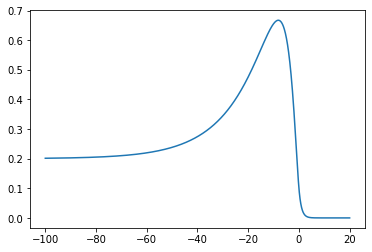

In [22]:
U_numeric = sym.lambdify(ξ, U_sol.subs(c, c_subs).subs(numeric_sub), modules=sympy_modules)
xs = np.linspace(-100, 20, 2001)
plt.plot(xs, U_numeric(xs))

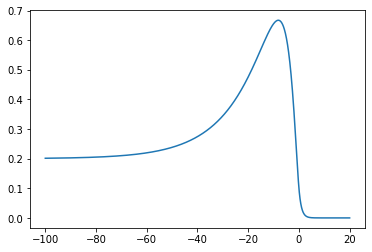

In [23]:
U_numeric = sym.lambdify(ξ, U_sol.subs(c, c_subs).subs(numeric_sub), modules=sympy_modules)
xs = np.linspace(-100, 20, 2001)
plt.plot(xs, U_numeric(xs))

In [24]:
c_subs.subs(numeric_sub)

3.75000000000000

In [25]:
U_right.subs(c, c_subs)

(1 + (-2*\alpha*\beta*\mu*\theta - 2*\alpha*\theta + \alpha - 2*\mu*\theta + sqrt(4*\alpha**2*\beta**2*\mu**2*\theta**2 - 8*\alpha**2*\beta*\mu*\theta**2 - 4*\alpha**2*\beta*\mu*\theta + 4*\alpha**2*\theta**2 - 4*\alpha**2*\theta + \alpha**2 + 8*\alpha*\beta*\mu**2*\theta**2 - 8*\alpha*\mu*\theta**2 + 4*\alpha*\mu*\theta + 4*\mu**2*\theta**2))/(4*\mu*\theta))*exp(-\xi)/(2*(1 + (-2*\alpha*\beta*\mu*\theta - 2*\alpha*\theta + \alpha - 2*\mu*\theta + sqrt(4*\alpha**2*\beta**2*\mu**2*\theta**2 - 8*\alpha**2*\beta*\mu*\theta**2 - 4*\alpha**2*\beta*\mu*\theta + 4*\alpha**2*\theta**2 - 4*\alpha**2*\theta + \alpha**2 + 8*\alpha*\beta*\mu**2*\theta**2 - 8*\alpha*\mu*\theta**2 + 4*\alpha*\mu*\theta + 4*\mu**2*\theta**2))/(4*\alpha*\theta))*(\alpha*\beta + 1 + (-2*\alpha*\beta*\mu*\theta - 2*\alpha*\theta + \alpha - 2*\mu*\theta + sqrt(4*\alpha**2*\beta**2*\mu**2*\theta**2 - 8*\alpha**2*\beta*\mu*\theta**2 - 4*\alpha**2*\beta*\mu*\theta + 4*\alpha**2*\theta**2 - 4*\alpha**2*\theta + \alpha**2 + 8

In [26]:
c

c

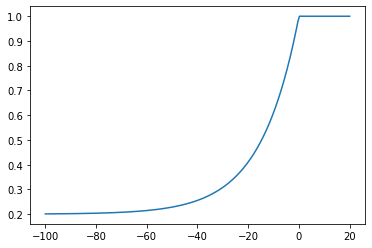

In [27]:
Q_numeric = sym.lambdify(ξ, Q_sol.subs(c, c_subs).subs(numeric_sub), modules=sympy_modules)
xs = np.linspace(-100, 20, 201)
plt.plot(xs, Q_numeric(xs))

# Wave response
We have
\begin{align*}
    -c\mu v_1' - v_1 &= -\frac{\delta(\xi)}{|U'(\xi)|}Q\big[(w * v_1) + \alpha\beta v_2) \big] \\
    -c\alpha v_2' - v_2 &= H(-\xi)\big(-(w*v_1) + \alpha\beta v_2\big)
\end{align*}

Choose $v_1(\xi) = H(\xi)e^{-\frac{1}{c\mu}\xi}$. We seek
\begin{align*}
    w * v_1 &= \int_0^\infty \frac{1}{2}e^{-|\xi - y|}e^{-\frac{1}{c\mu}y} \ dy \\
\end{align*}

If $\xi > 0$ then $-c\alpha v_2' - v_2 = 0$ and 

$v_2(\xi) = A_8 e^{-\frac{1}{c\alpha}\xi}$.

If $\xi < 0$ then $\xi - y < 0$ and
\begin{align*}
    (w * v_1) &= \int_0^\infty \frac{1}{2}e^{\xi} e^{-y}e^{-\frac{1}{c\mu}y} \ dy \\
        &= \frac{1}{2}e^{\xi} \int_0^\infty e^{-\frac{1+c\mu}{c\mu} y} \ dy \\
        &= \frac{c \mu}{2(1+c\mu)}e^{\xi}
\end{align*}
so we have
\begin{align*}
    -c\alpha v_2' - (1+\alpha\beta)v_2 &= -\frac{c \mu}{2(1+c\mu)}e^{\xi}
\end{align*}

In [28]:
v1 = sym.exp(-1/c/μ*ξ)*sym.Heaviside(ξ)

# Code Generation

In [40]:
def py_code(expr, replace_numpy=True, replace_unicode=True, numpy_package='np.'):
    code = sym.ccode(expr)
    
    if replace_unicode:
        unicode_replacements = [
            ('\\alpha', 'α'),
            ('\\beta', 'β'),
            ('\\gamma', 'γ'),
            ('\\Gamma', 'Γ'),
            ('\\delta', 'δ'),
            ('\\Delta', 'Δ'),
            ('\\epsilon', 'ϵ'),
            ('\\zeta', 'ζ'),
            ('\\eta', 'η'),
            ('\\theta', 'θ'),
            ('\\xi', 'ξ'),
            ('\\mu', 'μ')
        ]
        for unicode, symbol in unicode_replacements:
            code = code.replace(unicode, symbol)
    
    if replace_numpy:
        numpy_replacements = [
            ('exp', numpy_package + 'exp'),
            ('log', numpy_package + 'log'),
            ('sqrt', numpy_package + 'sqrt'),
            ('pow', '( lambda base, exponent: base**exponent )'),
            ('Heaviside', '(lambda input: np.heaviside(input,0.5))')
        ]
        for c_func, np_func in numpy_replacements:
            code = code.replace(c_func, np_func)
        
    return code

In [48]:
code = 'def get_speed(μ, α, β, θ):\n\treturn ' + py_code(c_subs)
print(code)

def get_speed(μ, α, β, θ):
	return (1.0/4.0)*(-2*α*β*μ*θ - 2*α*θ + α - 2*μ*θ + np.sqrt(4*( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(β, 2)*( lambda base, exponent: base**exponent )(μ, 2)*( lambda base, exponent: base**exponent )(θ, 2) - 8*( lambda base, exponent: base**exponent )(α, 2)*β*μ*( lambda base, exponent: base**exponent )(θ, 2) - 4*( lambda base, exponent: base**exponent )(α, 2)*β*μ*θ + 4*( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(θ, 2) - 4*( lambda base, exponent: base**exponent )(α, 2)*θ + ( lambda base, exponent: base**exponent )(α, 2) + 8*α*β*( lambda base, exponent: base**exponent )(μ, 2)*( lambda base, exponent: base**exponent )(θ, 2) - 8*α*μ*( lambda base, exponent: base**exponent )(θ, 2) + 4*α*μ*θ + 4*( lambda base, exponent: base**exponent )(μ, 2)*( lambda base, exponent: base**exponent )(θ, 2)))/(α*μ*θ)


In [58]:
def get_speed(μ, α, β, θ):
    return (1.0/4.0)*(-2*α*β*μ*θ - 2*α*θ + α - 2*μ*θ + np.sqrt(4*( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(β, 2)*( lambda base, exponent: base**exponent )(μ, 2)*( lambda base, exponent: base**exponent )(θ, 2) - 8*( lambda base, exponent: base**exponent )(α, 2)*β*μ*( lambda base, exponent: base**exponent )(θ, 2) - 4*( lambda base, exponent: base**exponent )(α, 2)*β*μ*θ + 4*( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(θ, 2) - 4*( lambda base, exponent: base**exponent )(α, 2)*θ + ( lambda base, exponent: base**exponent )(α, 2) + 8*α*β*( lambda base, exponent: base**exponent )(μ, 2)*( lambda base, exponent: base**exponent )(θ, 2) - 8*α*μ*( lambda base, exponent: base**exponent )(θ, 2) + 4*α*μ*θ + 4*( lambda base, exponent: base**exponent )(μ, 2)*( lambda base, exponent: base**exponent )(θ, 2)))/(α*μ*θ)

In [51]:
numeric_sub

{\alpha: 20, \beta: 0.2, \mu: 1, \theta: 0.1}

In [52]:
get_speed(1, 20, .2, .1)

3.75

In [57]:
c_subs.subs(numeric_sub)

3.75000000000000

In [73]:
U_right

(\alpha*c + 1)*exp(-\xi)/(2*(\mu*c + 1)*(\alpha*\beta + \alpha*c + 1))

In [81]:
U_code = sym.Heaviside(ξ)*U_right + sym.Heaviside(-ξ)*U_left
code = 'def U_numeric(ξ, μ, α, β, θ):\n\treturn ' + py_code(U_code)
print(code)

def U_numeric(ξ, μ, α, β, θ):
	return // Not supported in C:
// (lambda input: np.heaviside(input,0.5))
// (lambda input: np.heaviside(input,0.5))
(1.0/2.0)*(α*c + 1)*np.exp(-ξ)*(lambda input: np.heaviside(input,0.5))(ξ)/((μ*c + 1)*(α*β + α*c + 1)) + (-1.0/2.0*( lambda base, exponent: base**exponent )(α, 3)*β*c*np.exp(ξ*(β + 1.0/α)/c)/((α*β*μ - α + μ)*(( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(β, 2) + ( lambda base, exponent: base**exponent )(α, 2)*β*c + 2*α*β + α*c + 1)) - 1.0/2.0*( lambda base, exponent: base**exponent )(α, 3)*β*c*np.exp(ξ*(β + 1.0/α)/c)/((α*β*μ - α + μ)*(-( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(β, 2) + ( lambda base, exponent: base**exponent )(α, 2)*β*c - 2*α*β + α*c - 1)) + (1.0/2.0)*α*β/(( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(β, 2) + ( lambda base, exponent: base**exponent )(α, 2)*β*c + 2*α*β + α*c + 1) + (1.0/2.0)*α*

In [75]:
def U_numeric(ξ, μ, α, β, θ):
    c = get_speed(μ, α, β, θ)
    return (1.0/2.0)*(α*c + 1)*np.exp(-ξ)*(lambda input: np.heaviside(input,0.5))(ξ)/((μ*c + 1)*(α*β + α*c + 1)) + (-1.0/2.0*( lambda base, exponent: base**exponent )(α, 3)*β*c*np.exp(ξ*(β + 1.0/α)/c)/((α*β*μ - α + μ)*(( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(β, 2) + ( lambda base, exponent: base**exponent )(α, 2)*β*c + 2*α*β + α*c + 1)) - 1.0/2.0*( lambda base, exponent: base**exponent )(α, 3)*β*c*np.exp(ξ*(β + 1.0/α)/c)/((α*β*μ - α + μ)*(-( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(β, 2) + ( lambda base, exponent: base**exponent )(α, 2)*β*c - 2*α*β + α*c - 1)) + (1.0/2.0)*α*β/(( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(β, 2) + ( lambda base, exponent: base**exponent )(α, 2)*β*c + 2*α*β + α*c + 1) + (1.0/2.0)*α*c/(( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(β, 2) + ( lambda base, exponent: base**exponent )(α, 2)*β*c + 2*α*β + α*c + 1) + (( lambda base, exponent: base**exponent )(α, 3)*β*μ*( lambda base, exponent: base**exponent )(c, 2)/(( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(β, 2) + ( lambda base, exponent: base**exponent )(α, 2)*β*c + 2*α*β + α*c + 1) + ( lambda base, exponent: base**exponent )(α, 3)*β*μ*( lambda base, exponent: base**exponent )(c, 2)/(-( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(β, 2) + ( lambda base, exponent: base**exponent )(α, 2)*β*c - 2*α*β + α*c - 1) - ( lambda base, exponent: base**exponent )(α, 3)*β*c/(( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(β, 2) + ( lambda base, exponent: base**exponent )(α, 2)*β*c + 2*α*β + α*c + 1) - ( lambda base, exponent: base**exponent )(α, 3)*β*c/(-( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(β, 2) + ( lambda base, exponent: base**exponent )(α, 2)*β*c - 2*α*β + α*c - 1) + 2*α*β*( lambda base, exponent: base**exponent )(μ, 2)*θ*c - α*β*( lambda base, exponent: base**exponent )(μ, 2)*c*(α*β/(( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(β, 2) + ( lambda base, exponent: base**exponent )(α, 2)*β*c + 2*α*β + α*c + 1) + α*c/(( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(β, 2) + ( lambda base, exponent: base**exponent )(α, 2)*β*c + 2*α*β + α*c + 1) + 1.0/(( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(β, 2) + ( lambda base, exponent: base**exponent )(α, 2)*β*c + 2*α*β + α*c + 1)) - α*β*( lambda base, exponent: base**exponent )(μ, 2)*c/(α*β + 1) - 2*α*β*μ*θ + α*β*μ*(α*β/(( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(β, 2) + ( lambda base, exponent: base**exponent )(α, 2)*β*c + 2*α*β + α*c + 1) + α*c/(( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(β, 2) + ( lambda base, exponent: base**exponent )(α, 2)*β*c + 2*α*β + α*c + 1) + 1.0/(( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(β, 2) + ( lambda base, exponent: base**exponent )(α, 2)*β*c + 2*α*β + α*c + 1)) + α*β*μ*(-( lambda base, exponent: base**exponent )(α, 2)*β*c/(-( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(β, 2) + ( lambda base, exponent: base**exponent )(α, 2)*β*c - 2*α*β + α*c - 1) + α*β/(-( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(β, 2) + ( lambda base, exponent: base**exponent )(α, 2)*β*c - 2*α*β + α*c - 1) - α*c/(-( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(β, 2) + ( lambda base, exponent: base**exponent )(α, 2)*β*c - 2*α*β + α*c - 1) + 1.0/(-( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(β, 2) + ( lambda base, exponent: base**exponent )(α, 2)*β*c - 2*α*β + α*c - 1)) + α*β*μ/(α*β + 1) - 2*α*μ*θ*c + α*μ*c*(α*β/(( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(β, 2) + ( lambda base, exponent: base**exponent )(α, 2)*β*c + 2*α*β + α*c + 1) + α*c/(( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(β, 2) + ( lambda base, exponent: base**exponent )(α, 2)*β*c + 2*α*β + α*c + 1) + 1.0/(( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(β, 2) + ( lambda base, exponent: base**exponent )(α, 2)*β*c + 2*α*β + α*c + 1)) + α*μ*c/(α*β + 1) + 2*α*θ - α*(α*β/(( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(β, 2) + ( lambda base, exponent: base**exponent )(α, 2)*β*c + 2*α*β + α*c + 1) + α*c/(( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(β, 2) + ( lambda base, exponent: base**exponent )(α, 2)*β*c + 2*α*β + α*c + 1) + 1.0/(( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(β, 2) + ( lambda base, exponent: base**exponent )(α, 2)*β*c + 2*α*β + α*c + 1)) - α*(-( lambda base, exponent: base**exponent )(α, 2)*β*c/(-( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(β, 2) + ( lambda base, exponent: base**exponent )(α, 2)*β*c - 2*α*β + α*c - 1) + α*β/(-( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(β, 2) + ( lambda base, exponent: base**exponent )(α, 2)*β*c - 2*α*β + α*c - 1) - α*c/(-( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(β, 2) + ( lambda base, exponent: base**exponent )(α, 2)*β*c - 2*α*β + α*c - 1) + 1.0/(-( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(β, 2) + ( lambda base, exponent: base**exponent )(α, 2)*β*c - 2*α*β + α*c - 1)) - α/(α*β + 1) + 2*( lambda base, exponent: base**exponent )(μ, 2)*θ*c - ( lambda base, exponent: base**exponent )(μ, 2)*c*(α*β/(( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(β, 2) + ( lambda base, exponent: base**exponent )(α, 2)*β*c + 2*α*β + α*c + 1) + α*c/(( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(β, 2) + ( lambda base, exponent: base**exponent )(α, 2)*β*c + 2*α*β + α*c + 1) + 1.0/(( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(β, 2) + ( lambda base, exponent: base**exponent )(α, 2)*β*c + 2*α*β + α*c + 1)) - ( lambda base, exponent: base**exponent )(μ, 2)*c/(α*β + 1) - 2*μ*θ + μ*(α*β/(( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(β, 2) + ( lambda base, exponent: base**exponent )(α, 2)*β*c + 2*α*β + α*c + 1) + α*c/(( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(β, 2) + ( lambda base, exponent: base**exponent )(α, 2)*β*c + 2*α*β + α*c + 1) + 1.0/(( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(β, 2) + ( lambda base, exponent: base**exponent )(α, 2)*β*c + 2*α*β + α*c + 1)) + μ*(-( lambda base, exponent: base**exponent )(α, 2)*β*c/(-( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(β, 2) + ( lambda base, exponent: base**exponent )(α, 2)*β*c - 2*α*β + α*c - 1) + α*β/(-( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(β, 2) + ( lambda base, exponent: base**exponent )(α, 2)*β*c - 2*α*β + α*c - 1) - α*c/(-( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(β, 2) + ( lambda base, exponent: base**exponent )(α, 2)*β*c - 2*α*β + α*c - 1) + 1.0/(-( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(β, 2) + ( lambda base, exponent: base**exponent )(α, 2)*β*c - 2*α*β + α*c - 1)) + μ/(α*β + 1))*np.exp(ξ/(μ*c))/(2*α*β*( lambda base, exponent: base**exponent )(μ, 2)*c - 2*α*β*μ - 2*α*μ*c + 2*α + 2*( lambda base, exponent: base**exponent )(μ, 2)*c - 2*μ) + (1.0/2.0)/(( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(β, 2) + ( lambda base, exponent: base**exponent )(α, 2)*β*c + 2*α*β + α*c + 1) - 1.0/2.0*(-( lambda base, exponent: base**exponent )(α, 2)*β*c/(-( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(β, 2) + ( lambda base, exponent: base**exponent )(α, 2)*β*c - 2*α*β + α*c - 1) + α*β/(-( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(β, 2) + ( lambda base, exponent: base**exponent )(α, 2)*β*c - 2*α*β + α*c - 1) - α*c/(-( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(β, 2) + ( lambda base, exponent: base**exponent )(α, 2)*β*c - 2*α*β + α*c - 1) + 1.0/(-( lambda base, exponent: base**exponent )(α, 2)*( lambda base, exponent: base**exponent )(β, 2) + ( lambda base, exponent: base**exponent )(α, 2)*β*c - 2*α*β + α*c - 1))*np.exp(ξ)/(μ*c - 1) + (1.0/2.0)/(α*β + 1))*(lambda input: np.heaviside(input,0.5))(-ξ)

In [76]:
numeric_sub

{\alpha: 20, \beta: 0.2, \mu: 1, \theta: 0.1}

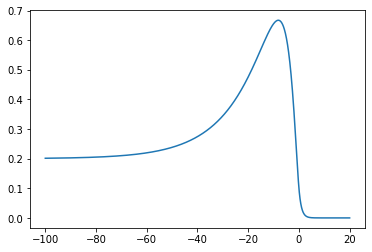

In [77]:
xs = np.linspace(-100, 20, 2001)
plt.plot(xs, U_numeric(xs, 1, 20, 0.2, .1))

In [82]:
Q_code = sym.Heaviside(ξ)*Q_right + sym.Heaviside(-ξ)*Q_left
code = 'def Q_numeric(ξ, μ, α, β, θ):\n\treturn ' + py_code(Q_code)
print(code)

def Q_numeric(ξ, μ, α, β, θ):
	return // Not supported in C:
// (lambda input: np.heaviside(input,0.5))
// (lambda input: np.heaviside(input,0.5))
(lambda input: np.heaviside(input,0.5))(ξ) + (α*β*np.exp(ξ*(α*β + 1)/(α*c)) + 1)*(lambda input: np.heaviside(input,0.5))(-ξ)/(α*β + 1)


In [83]:
def Q_numeric(ξ, μ, α, β, θ):
    c = get_speed(μ, α, β, θ)
    return (lambda input: np.heaviside(input,0.5))(ξ) + (α*β*np.exp(ξ*(α*β + 1)/(α*c)) + 1)*(lambda input: np.heaviside(input,0.5))(-ξ)/(α*β + 1)

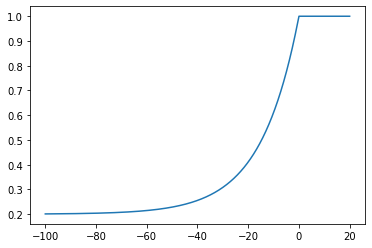

In [84]:
xs = np.linspace(-100, 20, 2001)
plt.plot(xs, Q_numeric(xs, 1, 20, 0.2, .1))